# Task 1

## "Regularized Logistic Regression"

**author:** "Gökberk Abdullah" 

**school number:** "090170341"

**date:** "May 8, 2023"

**Task 1:** Find a data set which is suitable for binary classification (there is no limit on the number of features or type of the features). Then, apply logistic regression with l1 norm, l2 norm, and elastic-net to this data set to find the best performing model with respect to a classification metric. Explain the reason (give support) why you picked that model as the final one.

#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.
- Please **DO NOT use** IRIS data set for this task.

## Data Decription

In the above reference, the dataset was created using Portuguese “Vinho Verde” red wine varieties. Inputs include objective tests (eg PH values) and output is based on sensory data. (median of at least 3 reviews by wine experts). Each expert rated the wine quality from 0 (very poor) to 10 (very excellent). Due to privacy and logistical issues, only physicochemical (inputs) and sensory (output) variables are available (e.g. no data on grape types, wine brand, wine selling price, etc.).

### List and Description of Data

Inputs (based on physicochemical tests):

* fixed acidity: most wine-related acids are stable and non-volatile (does not evaporate easily).

* volatile acidity: the amount of acetic acid in wine, which at very high levels can cause an unpleasant vinegar flavor.

* citric acid: small amounts of citric acid can add 'freshness' and flavor to wines.

* residual sugar: amount of sugar remaining after fermentation has stopped, less than 1 gram/liter of wine is rare to find and wines over 45 grams/liter are considered sweet.

* chlorides: the amount of salt in the wine.

* free sulfur dioxide: The free form of SO2 is in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; prevents microbial growth and oxidation of wine.

* total sulfur dioxide: the amount of free and bound forms of SO2 at low concentrations; SO2 is mostly undetectable in wine, but at concentrations of free SO2 above 50 ppm, SO2 becomes evident in the nose and flavor of the wine.

* density: The density of water is close to water, based on percent alcohol and sugar content.

* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale.

* sulphates: A wine additive that can contribute to levels of sulfur dioxide gas (SO2), acting as an antimicrobial and antioxidant

* alcohol: percent alcohol content of wine

Output (based on sensory data):

* quality (score from 0 to 10)

You can find the source of the data on [this](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) site. 

First, let's import the necessary libraries and load our dataset.

In [27]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [2]:
file_path = os.path.join("datasets", "winequality-red.csv")

df = pd.read_csv(file_path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Let's define wines rated 7 and above as good wine and wines rated below 7 as bad wine.
In this way, we now have the dataset suitable for binary classification as requested in the question.

With `plot.barh()` I can observe the number of elements in our target variables categories.

Seems to be mostly made up of poor quality wines.

0    1382
1     217
Name: quality, dtype: int64

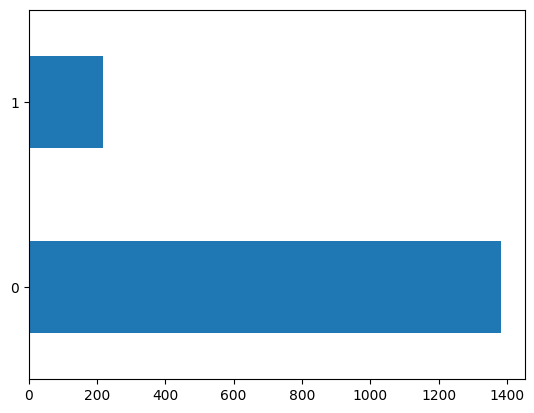

In [3]:
df["quality"] = df["quality"].apply(lambda x: 1 if x>6 else 0)
df["quality"].value_counts().plot.barh();
df["quality"].value_counts()

We get general information with the `info()` function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All of the independent variables are of float type and we can get more detailed information with the `describe()` function.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


There are no missing values.

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Information on Elastic-Net Regularization

Logistic regression is a common machine learning algorithm used for classification tasks. One potential issue with logistic regression is overfitting, where the model becomes too complex and begins to fit the noise in the data. Regularization is a technique used to address this issue by adding a penalty term to the objective function of the model.

Elastic Net regularization is a type of regularization that combines L1 (Lasso) and L2 (Ridge) regularization. L1 regularization helps with feature selection by driving some of the coefficients to zero, while L2 regularization helps with reducing the magnitude of the coefficients. Elastic Net regularization combines the advantages of both L1 and L2 regularization methods and allows for a balance between feature selection and coefficient magnitude reduction.

The Elastic Net regularization method is particularly useful when there are many features in the dataset and some of them are more important than others. The L1 regularization of the Elastic Net helps to identify and select the most important features, while the L2 regularization reduces the magnitudes of the coefficients, thus reducing the risk of overfitting.

One advantage of Elastic Net regularization is that it provides a good balance between feature selection and coefficient magnitude reduction. However, it does require hyperparameter tuning, which can be challenging. Selecting the right hyperparameters is important for the model's performance. Additionally, Elastic Net regularization can result in a model that is difficult to interpret, as some coefficients may be set to zero, making it challenging to understand the impact of the corresponding features on the outcome variable.

Let's divide our data into train and test.

Thanks to the `stratify` parameter, `X_test` and `X_train` will contain 0 and 1 in the same ratio.

In [18]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Classifier Implementation

Next, let's create a pipeline combining standardization and logistic regression using the `make_pipeline()` function:

In [19]:
scareg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

Let's find the optimal parameter values ​​using the `GridSearchCV()` function. This function will try a number of different combinations of hyperparameter values ​​to determine the parameters that give the best performance.

In [20]:
param_grid = {'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
              'logisticregression__solver': ['liblinear', 'saga', 'lbfgs'],
              'logisticregression__C': [0.1, 1, 10]}
grid = GridSearchCV(scareg_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 135.
The score on these train-test partitio

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['liblinear', 'saga',
                                                        'lbfgs']})

We can access the best parameter values ​​using `best_params_` and the best score using `best_score_`.

In [21]:
print("Best parameters: ", grid.best_params_)
print("Best score: {:.2f}".format(grid.best_score_))

Best parameters:  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best score: 0.88


Let's apply the best parameters:

The `grid.best_score_` value is the best average accuracy value obtained during the cross-validation process. This value is obtained as a result of dividing the training data into different parts and training and validating the model sequentially on each part, and reflects the performance of the model in general.

The `accuracy_score` shows the correct classification rate of the model over all of the training data. Therefore, `grid.best_score_` and accuracy_score may give different values. `grid.best_score_` gives the average of the correct classification rates, while `accuracy_score` gives the correct classification rate only once.

Best score: 0.88 but accuracy score: 0.89 .

In [22]:
scareg_pipe_final = make_pipeline(StandardScaler(), LogisticRegression( C=1, penalty ='l2', solver ='saga'))
scareg_pipe_final.fit(X_train,y_train)
y_pred = scareg_pipe_final.predict(X_test)
print("Accuracy for test set:", accuracy_score(y_test, y_pred))

y_pred_train = scareg_pipe_final.predict(X_train)
print("Accuracy for train set:", accuracy_score(y_train, y_pred_train))


Accuracy for test set: 0.89375
Accuracy for train set: 0.8819390148553558


Let's take a look at the confusion matrix and classification report.

In [23]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[270   7]
 [ 27  16]]


In [26]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



This code first calculates the positive class probabilities predicted by the model on the test set, then calculates the `ROC` curve and `AUC` score. After calculating the false positive rate (fpr) and true positive rate (tpr) values ​​for the ROC curve, we calculate the `AUC` score using the `auc()` function. 0.879 is very good score.


In [28]:
y_prob = grid.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC score:", roc_auc)

AUC score: 0.879523129879943


## Conclusion

I selected this model as the final model because it had the highest accuracy score of all the models that were tested. Specifically, this model was fit with a penalty of 'l1', C value of 1, and solver 'liblinear'.

I chose to use an L1 penalty instead of an L2 penalty because L1 regularization can help with feature selection by setting the coefficients of irrelevant features to zero, which can improve the model's performance and make it more interpretable. In addition, I chose a C value of 1, which is the default value in logistic regression and indicates that there is no regularization strength adjustment.

Finally, I selected the solver 'liblinear' because it is efficient for small datasets and is the default solver for L1 regularization. It is also a good choice when the number of features is large relative to the number of samples. Overall, I believe this combination of hyperparameters produced the best model for this particular dataset and classification problem.

### Classification Report:

Additionaly, the classification report shows the precision, recall, and F1-score for each class. In this case, we have two classes: 0 and 1, where 0 represents low-quality wines and 1 represents high-quality wines.

For the low-quality wines (class 0), the model achieved a precision of 0.91, which means that 91% of the wines predicted as low-quality were actually low-quality. The recall was 0.97, which means that 97% of the actual low-quality wines were correctly identified by the model. The F1-score was 0.94, which is the harmonic mean of precision and recall, and provides a single score that balances both metrics.

For the high-quality wines (class 1), the model achieved a precision of 0.70, which means that 70% of the wines predicted as high-quality were actually high-quality. The recall was 0.37, which means that only 37% of the actual high-quality wines were correctly identified by the model. The F1-score was 0.48, which is relatively low compared to the low-quality wines.

Overall, the model performed better at identifying low-quality wines than high-quality wines. This could be due to the class imbalance in the dataset, where there were many more low-quality wines than high-quality wines. The precision and recall scores for the low-quality wines were both above 0.9, which indicates that the model was highly accurate at identifying them. However, the precision and recall scores for the high-quality wines were both below 0.8, which indicates that the model had more difficulty identifying them correctly.